<h1><center>SST Changes in the Gulf of Maine</center></h1>

<center>This notebook uses POP2 CCSM Ocean Component output to investigate the SST in the Gulf of Maine</center>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import xarray as xr 
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
from IPython.display import clear_output
from IPython.display import display, HTML
from scipy import stats
from scipy import optimize
import numpy.polynomial.polynomial as npoly
import matplotlib.gridspec as gridspec


%run /home/ncresswell/Desktop/AzoresHigh_850-2005/MyFunctions/DataAnalyzing.py

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

<h1>Full Forcings Simulations, LME </h1>

<center><h2>Feb, Mar, Apr, May</h2></center>

Here I load the SST data, filter for time and space, then average the SST in the filtered region to get a time series of SST in GoM during the FMAM season

In [69]:
###########################################################################################################################
######################################               PARAMETERS               #############################################
###########################################################################################################################

#define boundaries of Gulf of Maine
lat_range = [41.5,45]
lon_range = [-74,-66]

#identify months the indices of months to average; range is from 0 to 11 i.e. 0=jan, 1=feb etc...
month_index = np.array([1,2,3,4])

#handle one ensemble member at a time 
for ensemble_member in range(1,2):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.00'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
        
    #center lon on 0 
    SST.TLONG.values = xr.where(SST.TLONG.values>180,
                                SST.TLONG.values-360,
                                SST.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
    SST_GoM = SST.where(np.logical_and(np.logical_and(SST.TLAT>lat_range[0], SST.TLAT<lat_range[1]),
                                       np.logical_and(SST.TLONG>lon_range[0], SST.TLONG<lon_range[1])),
                        np.nan)

Processing ensemble member 1
    sptially filtering


Make a little map to show the region we're working on...

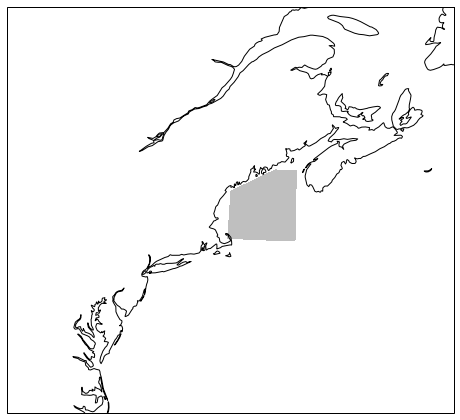

In [35]:
sst = SST_GoM.mean(axis=0).values
lat = SST_GoM.TLAT.values
lon = SST_GoM.TLONG.values

gom_filter = np.ones(sst.shape)
gom_filter[np.where(np.isnan(sst))]=np.nan

fig, ax = plt.subplots(figsize=(8,8))

ax = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_latitude=45,central_longitude=-70))
ax.coastlines(resolution='50m')
ax.set_extent([-80,-60,35,50])

im = ax.contourf(lon,lat,gom_filter,transform=ccrs.PlateCarree(),cmap='binary');

In [2]:
###########################################################################################################################
######################################               PARAMETERS               #############################################
###########################################################################################################################

#define boundaries of Gulf of Maine
lat_range = [41.5,45]
lon_range = [-74,-66]

#identify months the indices of months to average; range is from 0 to 11 i.e. 0=jan, 1=feb etc...
month_index = np.array([1,2,3,4])

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

#initialize the array that will hold the SST time series for each ensemble member 
LME_GoM_SST = xr.DataArray(np.ones([13,1156])*np.nan,
              coords=[np.arange(1,14),np.arange(850,2006)], 
              dims=['ensemble_member', 'time'], 
              attrs={'Info':'Yearly average Feb, Mar, Apr, May SST in the Gulf of Maine as produced by the CESM-LME full forcing simulations',
                     'Season':'FMAM'})

#handle one ensemble member at a time 
for ensemble_member in range(1,14):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.00'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
    else:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.0'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
        
    #keeping myself updated on progress
    print('    converting longitude to be from -180 to 180')
    #center lon on 0 
    SST.TLONG.values = xr.where(SST.TLONG.values>180,
                                SST.TLONG.values-360,
                                SST.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
    SST_GoM = SST.where(np.logical_and(np.logical_and(SST.TLAT>lat_range[0], SST.TLAT<lat_range[1]),
                                       np.logical_and(SST.TLONG>lon_range[0], SST.TLONG<lon_range[1])),
                        np.nan)
    
    #average GoM SST
    SST_GoM_average = SST_GoM.mean(axis=1,skipna=True).mean(axis=1,skipna=True)
    
    #keeping myself updated on progress
    print('    temporal filtering and averaging...')
    #average FMAM
    temp = SST_GoM_average.values.reshape(1156,12)
    for index in range(0,12):
        if np.logical_not(np.any(index == month_index)):
            temp[:,index]=np.ones(1156)*np.nan
    SST_GoM_average_FMAM_average = np.nanmean(temp,axis=1)
    
    #keeping myself updated on progress
    print('    COMPLETED...saving timeseries')
    #assign index to initialized array
    LME_GoM_SST[ensemble_member-1,:]=SST_GoM_average_FMAM_average

Processing ensemble member 1
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 2
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 3
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 4
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 5
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 6
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and ave

Here I'll perform breakpoint analysis on the SST timeseries

In [3]:
SST = xr.open_dataarray('LME.GoM.SST.FMAM.nc')

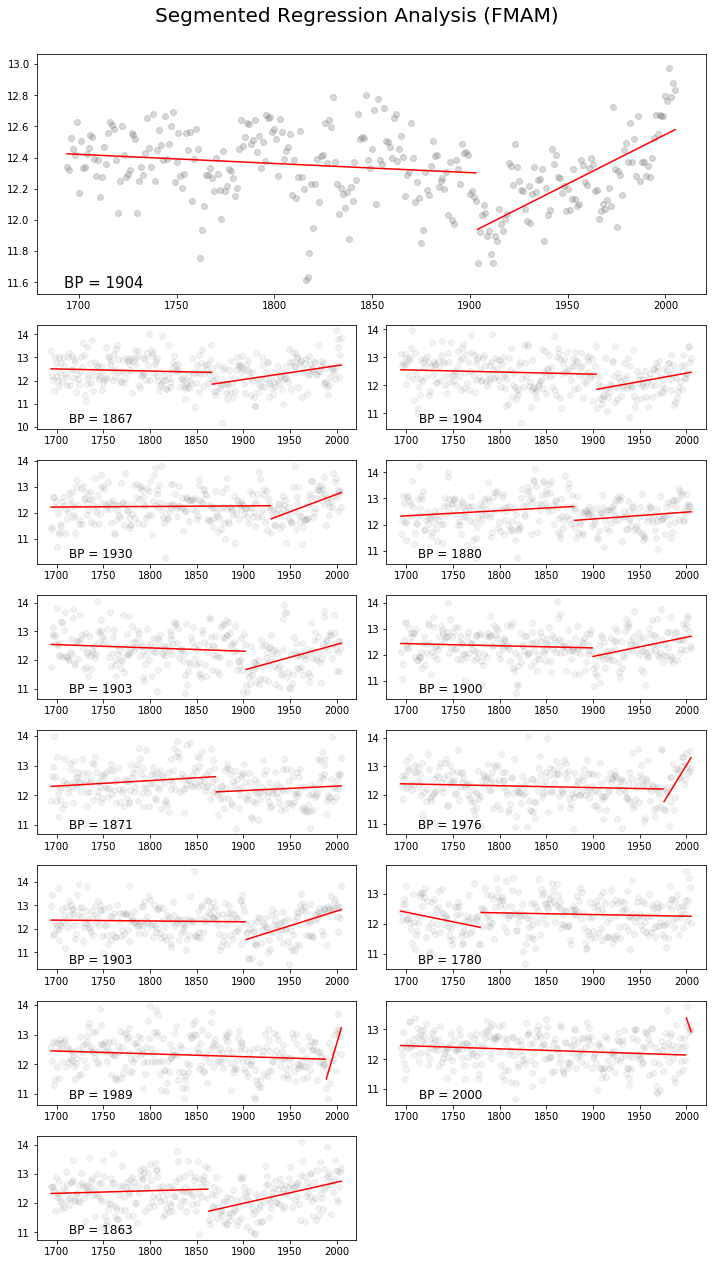

In [5]:
###########################################################################################################################
######################################        FUNCTION DEFINITIONS            #############################################
###########################################################################################################################

def f(breakpoints, x, y, fcache,num_breakpoints=1):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=1):
#     print('passed breakpoints are: ', breakpoints)
    breakpoints = tuple(map(int, sorted(breakpoints)))
#     print('processed breakpoints are: ', breakpoints)
    xs = np.split(x, breakpoints)
#     print('xs is ',xs)
#     print('')
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

###########################################################################################################################
##################################################    PARAMETERS   ########################################################
###########################################################################################################################

axes_fontsize = 12
subtitle_fontsize = 15 

mean_axes_fontsize = 15
mean_title_fontsize = 18

num_breakpoints = 1

start_date = 1694
end_date   = 2006

###########################################################################################################################
############################################   CALCULATIONS AND DISPLAY    ################################################
###########################################################################################################################

fig = plt.figure(figsize=(10,17))
gs = gridspec.GridSpec(9, 2)
# fig,axs = plt.subplots(nrows=9,ncols=2,figsize = (10,20))

for ensemble_member in range(0,13):

    #identify arrays to be used for segmented regression analysis
    x = np.arange(start_date,end_date)
    y = SST.values[ensemble_member,start_date-850:end_date-850]
    
    current_ax = plt.subplot(gs[int(ensemble_member/2+2),int(ensemble_member%2)])

    #use brute force to find optimal breakpoint[s]
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
    #plot raw data 
    current_ax.scatter(x, y, c='grey',alpha=.1)
    #plot segmented regression 
    if num_breakpoints > 1:
        for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, currentf(x_interval), 'r-')
            current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.2,y=.0)
    elif num_breakpoints == 1:
        for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, current_f(x_interval), 'r-')
            current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.2,y=.0)
        
    #clear variables
    del breakpoints
    del y 
    del x    

#
#identify arrays to be used for segmented regression analysis
x = np.arange(start_date,end_date)
y = SST.values[:,start_date-850:end_date-850].mean(axis=0)
    
current_ax = plt.subplot(gs[0:4])

#use brute force to find optimal breakpoint[s]
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
#plot raw data 
current_ax.scatter(x, y, c='grey',alpha=.3)
#plot segmented regression 
if num_breakpoints > 1:
    for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, currentf(x_interval), 'r-')
        current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)
elif num_breakpoints == 1:
    for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, current_f(x_interval), 'r-')
        current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)

fig.tight_layout()
fig.suptitle('Segmented Regression Analysis (FMAM)',fontsize=20,y=1.03);

<center><h2>June, July, August</h2></center>

Here I load the SST data, filter for time and space, then average the SST in the filtered region to get a time series of SST in GoM during the JJA season

In [207]:
###########################################################################################################################
######################################               PARAMETERS               #############################################
###########################################################################################################################

#define boundaries of Gulf of Maine
lat_range = [41.5,45]
lon_range = [-74,-66]

#identify months the indices of months to average; range is from 0 to 11 i.e. 0=jan, 1=feb etc...
month_index = np.array([5,6,7])

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

#initialize the array that will hold the SST time series for each ensemble member 
LME_GoM_SST = xr.DataArray(np.ones([13,1156])*np.nan,
              coords=[np.arange(1,14),np.arange(850,2006)], 
              dims=['ensemble_member', 'time'], 
              attrs={'Info':'Yearly average June, July, August SST in the Gulf of Maine as produced by the CESM-LME full forcing simulations',
                     'Season':'JJA'})

#handle one ensemble member at a time 
for ensemble_member in range(1,14):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.00'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
    else:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.0'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
        
    #keeping myself updated on progress
    print('    converting longitude to be from -180 to 180')
    #center lon on 0 
    SST.TLONG.values = xr.where(SST.TLONG.values>180,
                                SST.TLONG.values-360,
                                SST.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
    SST_GoM = SST.where(np.logical_and(np.logical_and(SST.TLAT>lat_range[0], SST.TLAT<lat_range[1]),
                                       np.logical_and(SST.TLONG>lon_range[0], SST.TLONG<lon_range[1])),
                        np.nan)
    
    #average GoM SST
    SST_GoM_average = SST_GoM.mean(axis=1,skipna=True).mean(axis=1,skipna=True)
    
    #keeping myself updated on progress
    print('    temporal filtering and averaging...')
    #average JJA
    temp = SST_GoM_average.values.reshape(1156,12)
    for index in range(0,12):
        if np.logical_not(np.any(index == month_index)):
            temp[:,index]=np.ones(1156)*np.nan
    SST_GoM_average_JJA_average = np.nanmean(temp,axis=1)
    
    #keeping myself updated on progress
    print('    COMPLETED...saving timeseries')
    #assign index to initialized array
    LME_GoM_SST[ensemble_member-1,:]=SST_GoM_average_JJA_average

Processing ensemble member 1
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 2
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 3
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 4
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 5
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 6
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and ave

In [6]:
SST = xr.open_dataarray('LME.GoM.SST.JJA.nc')

Here, I perform the segmented regession on the JJA data 

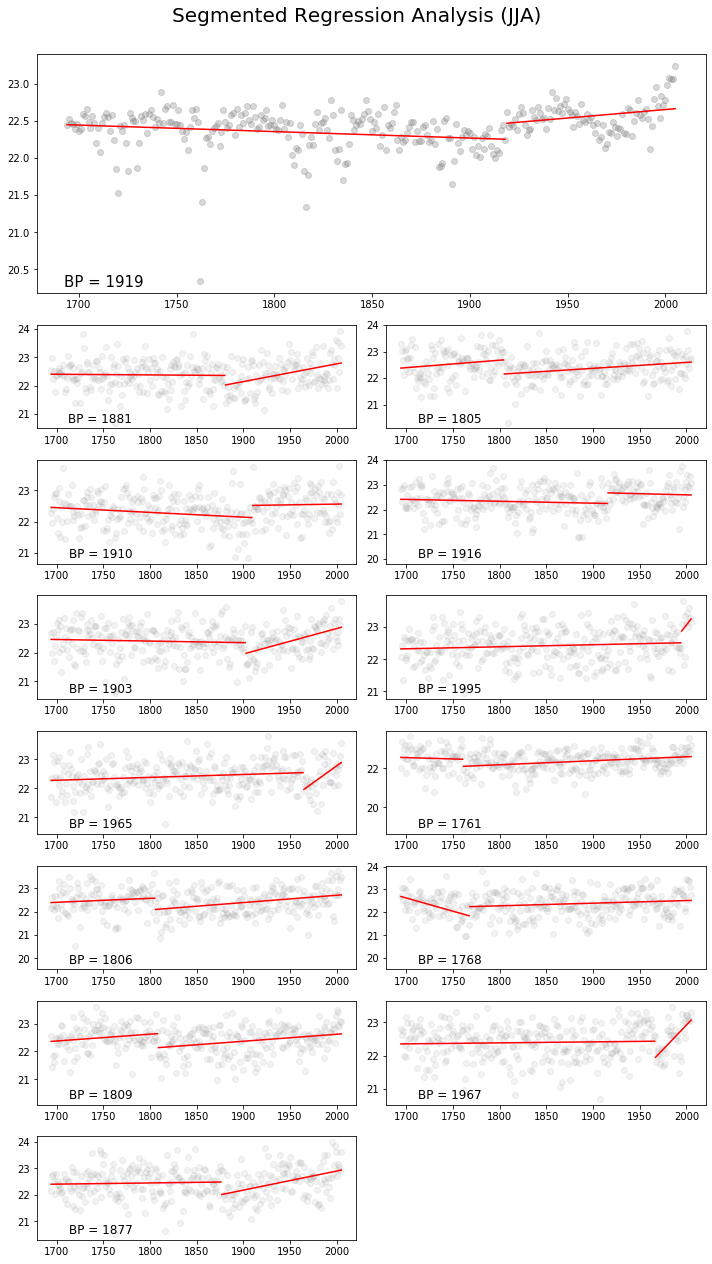

In [7]:
###########################################################################################################################
######################################        FUNCTION DEFINITIONS            #############################################
###########################################################################################################################

def f(breakpoints, x, y, fcache,num_breakpoints=1):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=1):
#     print('passed breakpoints are: ', breakpoints)
    breakpoints = tuple(map(int, sorted(breakpoints)))
#     print('processed breakpoints are: ', breakpoints)
    xs = np.split(x, breakpoints)
#     print('xs is ',xs)
#     print('')
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

###########################################################################################################################
##################################################    PARAMETERS   ########################################################
###########################################################################################################################

axes_fontsize = 12
subtitle_fontsize = 15 

mean_axes_fontsize = 15
mean_title_fontsize = 18

num_breakpoints = 1

start_date = 1694
end_date   = 2006

###########################################################################################################################
############################################   CALCULATIONS AND DISPLAY    ################################################
###########################################################################################################################

fig = plt.figure(figsize=(10,17))
gs = gridspec.GridSpec(9, 2)
# fig,axs = plt.subplots(nrows=9,ncols=2,figsize = (10,20))

for ensemble_member in range(0,13):

    #identify arrays to be used for segmented regression analysis
    x = np.arange(start_date,end_date)
    y = SST.values[ensemble_member,start_date-850:end_date-850]
    
    current_ax = plt.subplot(gs[int(ensemble_member/2+2),int(ensemble_member%2)])

    #use brute force to find optimal breakpoint[s]
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
    #plot raw data 
    current_ax.scatter(x, y, c='grey',alpha=.1)
    #plot segmented regression 
    if num_breakpoints > 1:
        for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, currentf(x_interval), 'r-')
            current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.2,y=.0)
    elif num_breakpoints == 1:
        for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, current_f(x_interval), 'r-')
            current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.2,y=.0)
        
    #clear variables
    del breakpoints
    del y 
    del x    

#
#identify arrays to be used for segmented regression analysis
x = np.arange(start_date,end_date)
y = SST.values[:,start_date-850:end_date-850].mean(axis=0)
    
current_ax = plt.subplot(gs[0:4])

#use brute force to find optimal breakpoint[s]
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
#plot raw data 
current_ax.scatter(x, y, c='grey',alpha=.3)
#plot segmented regression 
if num_breakpoints > 1:
    for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, currentf(x_interval), 'r-')
        current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)
elif num_breakpoints == 1:
    for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, current_f(x_interval), 'r-')
        current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)

fig.tight_layout()
fig.suptitle('Segmented Regression Analysis (JJA)',fontsize=20,y=1.03);

<center><h2>Offset Year: SONDJFMAMJJA</h2></center>

Here I load the SST data, filter for time and space, then average the SST in the filtered region to get a time series of SST in GoM during the JJA season

In [ ]:
###########################################################################################################################
######################################               PARAMETERS               #############################################
###########################################################################################################################

#define boundaries of Gulf of Maine
lat_range = [41.5,45]
lon_range = [-74,-66]

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

#initialize the array that will hold the SST time series for each ensemble member 
LME_GoM_SST = xr.DataArray(np.ones([13,1155])*np.nan,
              coords=[np.arange(1,14),np.arange(850,2005)], 
              dims=['ensemble_member', 'time'], 
              attrs={'Info':'Yearly offset year average SONDJFMAMJJA in the Gulf of Maine as produced by the CESM-LME full forcing simulations',
                     'Season':'Offset year SONDFMAMJJA; time is the year in which the offset begins'})

#handle one ensemble member at a time 
for ensemble_member in range(1,14):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.00'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
    else:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.0'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
        
    #keeping myself updated on progress
    print('    converting longitude to be from -180 to 180')
    #center lon on 0 
    SST.TLONG.values = xr.where(SST.TLONG.values>180,
                                SST.TLONG.values-360,
                                SST.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
    SST_GoM = SST.where(np.logical_and(np.logical_and(SST.TLAT>lat_range[0], SST.TLAT<lat_range[1]),
                                       np.logical_and(SST.TLONG>lon_range[0], SST.TLONG<lon_range[1])),
                        np.nan)
    
    #average GoM SST
    SST_GoM_average = SST_GoM.mean(axis=1,skipna=True).mean(axis=1,skipna=True)

    #keeping myself updated on progress
    print('    temporal filtering and averaging...')
    #average offset year
    temp = SST_GoM_average.values[8:-4].reshape(1155,12)
    SST_GoM_average_offset_year_average = np.nanmean(temp,axis=1)

    #keeping myself updated on progress
    print('    COMPLETED...saving timeseries')
    #assign index to initialized array
    LME_GoM_SST.values[ensemble_member-1,:]=SST_GoM_average_offset_year_average

In [4]:
SST = xr.open_dataarray('LME.GoM.SST.SONDJFMAMJJA.nc')

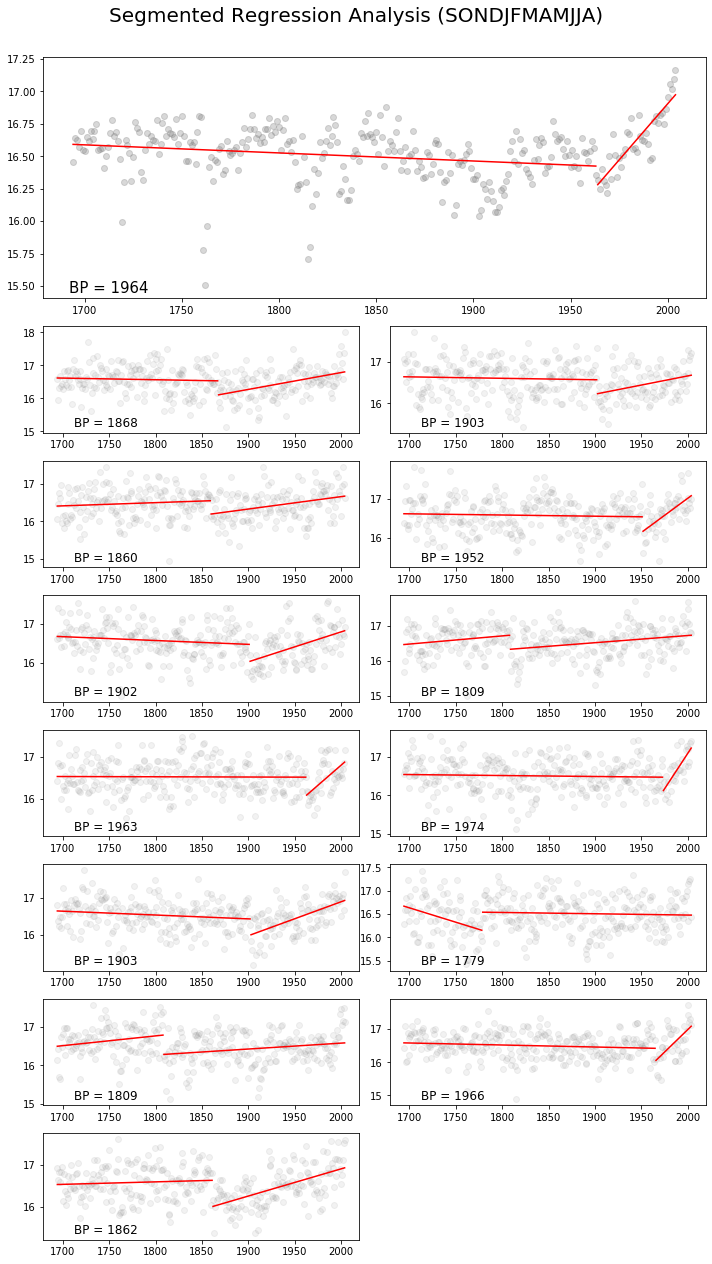

In [5]:
###########################################################################################################################
######################################        FUNCTION DEFINITIONS            #############################################
###########################################################################################################################

def f(breakpoints, x, y, fcache,num_breakpoints=1):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=1):
#     print('passed breakpoints are: ', breakpoints)
    breakpoints = tuple(map(int, sorted(breakpoints)))
#     print('processed breakpoints are: ', breakpoints)
    xs = np.split(x, breakpoints)
#     print('xs is ',xs)
#     print('')
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

###########################################################################################################################
##################################################    PARAMETERS   ########################################################
###########################################################################################################################

axes_fontsize = 12
subtitle_fontsize = 15 

mean_axes_fontsize = 15
mean_title_fontsize = 18

num_breakpoints = 1

start_date = 1694
end_date   = 2005

###########################################################################################################################
############################################   CALCULATIONS AND DISPLAY    ################################################
###########################################################################################################################

fig = plt.figure(figsize=(10,17))
gs = gridspec.GridSpec(9, 2)
# fig,axs = plt.subplots(nrows=9,ncols=2,figsize = (10,20))

for ensemble_member in range(0,13):

    #identify arrays to be used for segmented regression analysis
    x = np.arange(start_date,end_date)
    y = SST.values[ensemble_member,start_date-850:end_date-850]
    
    current_ax = plt.subplot(gs[int(ensemble_member/2+2),int(ensemble_member%2)])

    #use brute force to find optimal breakpoint[s]
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
    #plot raw data 
    current_ax.scatter(x, y, c='grey',alpha=.1)
    #plot segmented regression 
    if num_breakpoints > 1:
        for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, currentf(x_interval), 'r-')
            current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.2,y=.0)
    elif num_breakpoints == 1:
        for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, current_f(x_interval), 'r-')
            current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.2,y=.0)
        
    #clear variables
    del breakpoints
    del y 
    del x    

#
#identify arrays to be used for segmented regression analysis
x = np.arange(start_date,end_date)
y = SST.values[:,start_date-850:end_date-850].mean(axis=0)
    
current_ax = plt.subplot(gs[0:4])

#use brute force to find optimal breakpoint[s]
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
#plot raw data 
current_ax.scatter(x, y, c='grey',alpha=.3)
#plot segmented regression 
if num_breakpoints > 1:
    for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, currentf(x_interval), 'r-')
        current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)
elif num_breakpoints == 1:
    for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, current_f(x_interval), 'r-')
        current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)

fig.tight_layout()
fig.suptitle('Segmented Regression Analysis (SONDJFMAMJJA)',fontsize=20,y=1.03);

<h1>Greenhouse Gas-Only Simulations, LME</h1>

Here I'll perform segmented regression on GoM SST during FMAM, JJA and SONDJFMAMJJA as simulated by the greenhouse gas -only forcing simulations 

<center><h2>Feb, Mar, Apr, May</h2></center>

Here I load the SST from GHG-only simulations, filter for time and space, then average the SST in the filtered region to get a time series of SST in GoM during the FMAM season

In [9]:
###########################################################################################################################
######################################               PARAMETERS               #############################################
###########################################################################################################################

#define boundaries of Gulf of Maine
lat_range = [41.5,45]
lon_range = [-74,-66]

#identify months the indices of months to average; range is from 0 to 11 i.e. 0=jan, 1=feb etc...
month_index = np.array([1,2,3,4])

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

#initialize the array that will hold the SST time series for each ensemble member 
LME_GoM_SST = xr.DataArray(np.ones([3,1156])*np.nan,
              coords=[np.arange(1,4),np.arange(850,2006)], 
              dims=['ensemble_member', 'time'], 
              attrs={'Info':'Yearly average Feb, Mar, Apr, May SST in the Gulf of Maine as produced by the CESM-LME GHG-only simulations',
                     'Season':'FMAM',
                     'Forcing':'GHG-only'})

#handle one ensemble member at a time 
for ensemble_member in range(1,4):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.GHG.00'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
    else:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.GHG.0'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
        
    #keeping myself updated on progress
    print('    converting longitude to be from -180 to 180')
    #center lon on 0 
    SST.TLONG.values = xr.where(SST.TLONG.values>180,
                                SST.TLONG.values-360,
                                SST.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
    SST_GoM = SST.where(np.logical_and(np.logical_and(SST.TLAT>lat_range[0], SST.TLAT<lat_range[1]),
                                       np.logical_and(SST.TLONG>lon_range[0], SST.TLONG<lon_range[1])),
                        np.nan)
    
    #average GoM SST
    SST_GoM_average = SST_GoM.mean(axis=1,skipna=True).mean(axis=1,skipna=True)
    
    #keeping myself updated on progress
    print('    temporal filtering and averaging...')
    #average FMAM
    temp = SST_GoM_average.values.reshape(1156,12)
    for index in range(0,12):
        if np.logical_not(np.any(index == month_index)):
            temp[:,index]=np.ones(1156)*np.nan
    SST_GoM_average_FMAM_average = np.nanmean(temp,axis=1)
    
    #keeping myself updated on progress
    print('    COMPLETED...saving timeseries')
    #assign index to initialized array
    LME_GoM_SST[ensemble_member-1,:]=SST_GoM_average_FMAM_average

Processing ensemble member 1
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 2
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 3
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries


In [26]:
SST = xr.open_dataarray('LME.GoM.GHG-only.SST.FMAM.nc')

Here, I perform segmented regression on the GoM SST during FMAM as as projected by GHG-only forcing simulatins

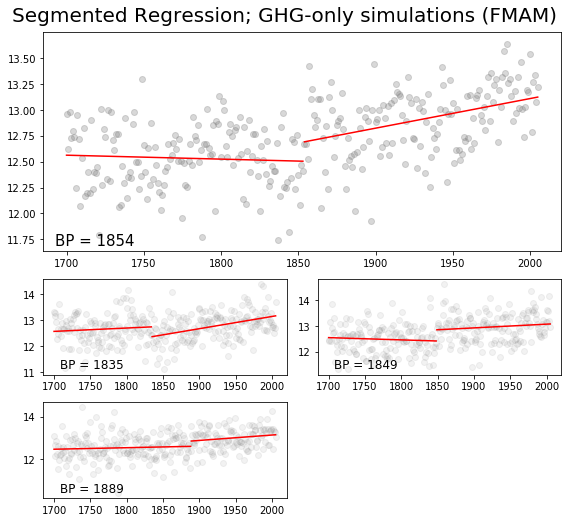

In [27]:
###########################################################################################################################
######################################        FUNCTION DEFINITIONS            #############################################
###########################################################################################################################

def f(breakpoints, x, y, fcache,num_breakpoints=1):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=1):
#     print('passed breakpoints are: ', breakpoints)
    breakpoints = tuple(map(int, sorted(breakpoints)))
#     print('processed breakpoints are: ', breakpoints)
    xs = np.split(x, breakpoints)
#     print('xs is ',xs)
#     print('')
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

###########################################################################################################################
##################################################    PARAMETERS   ########################################################
###########################################################################################################################

axes_fontsize = 12
subtitle_fontsize = 15 

mean_axes_fontsize = 15
mean_title_fontsize = 18

num_breakpoints = 1

start_date = 1700
end_date   = 2006

###########################################################################################################################
############################################   CALCULATIONS AND DISPLAY    ################################################
###########################################################################################################################

fig = plt.figure(figsize=(8,7))
gs = gridspec.GridSpec(4, 2)

for ensemble_member in range(0,3):

    #identify arrays to be used for segmented regression analysis
    x = np.arange(start_date,end_date)
    y = SST.values[ensemble_member,start_date-850:end_date-850]
    
    current_ax = plt.subplot(gs[int(ensemble_member/2+2),int(ensemble_member%2)])

    #use brute force to find optimal breakpoint[s]
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
    #plot raw data 
    current_ax.scatter(x, y, c='grey',alpha=.1)
    #plot segmented regression 
    if num_breakpoints > 1:
        for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, currentf(x_interval), 'r-')
            current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.2,y=.0)
    elif num_breakpoints == 1:
        for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, current_f(x_interval), 'r-')
            current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.2,y=.0)
        
    #clear variables
    del breakpoints
    del y 
    del x    

#
#identify arrays to be used for segmented regression analysis
x = np.arange(start_date,end_date)
y = SST.values[:,start_date-850:end_date-850].mean(axis=0)
    
current_ax = plt.subplot(gs[0:4])

#use brute force to find optimal breakpoint[s]
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
#plot raw data 
current_ax.scatter(x, y, c='grey',alpha=.3)
#plot segmented regression 
if num_breakpoints > 1:
    for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, currentf(x_interval), 'r-')
        current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)
elif num_breakpoints == 1:
    for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, current_f(x_interval), 'r-')
        current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)

fig.tight_layout()
fig.suptitle('Segmented Regression; GHG-only simulations (FMAM)',fontsize=20,y=1.03);

<center><h2>June, July, August</h2></center>

Here I load the SST data from the GHG-only forcing, filter for time and space, then average the SST in the filtered region to get a time series of SST in GoM during the JJA season

In [5]:
###########################################################################################################################
######################################               PARAMETERS               #############################################
###########################################################################################################################

#define boundaries of Gulf of Maine
lat_range = [41.5,45]
lon_range = [-74,-66]

#identify months the indices of months to average; range is from 0 to 11 i.e. 0=jan, 1=feb etc...
month_index = np.array([5,6,7])

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

#initialize the array that will hold the SST time series for each ensemble member 
LME_GoM_SST = xr.DataArray(np.ones([3,1156])*np.nan,
              coords=[np.arange(1,4),np.arange(850,2006)], 
              dims=['ensemble_member', 'time'], 
              attrs={'Info':'Yearly average June, July, August SST in the Gulf of Maine as produced by the CESM-LME GHG-only forcing simulations',
                     'Season':'JJA',
                     'Forcing':'GHG-only'})

#handle one ensemble member at a time 
for ensemble_member in range(1,4):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.GHG.00'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
    else:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.GHG.0'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
        
    #keeping myself updated on progress
    print('    converting longitude to be from -180 to 180')
    #center lon on 0 
    SST.TLONG.values = xr.where(SST.TLONG.values>180,
                                SST.TLONG.values-360,
                                SST.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
    SST_GoM = SST.where(np.logical_and(np.logical_and(SST.TLAT>lat_range[0], SST.TLAT<lat_range[1]),
                                       np.logical_and(SST.TLONG>lon_range[0], SST.TLONG<lon_range[1])),
                        np.nan)
    
    #average GoM SST
    SST_GoM_average = SST_GoM.mean(axis=1,skipna=True).mean(axis=1,skipna=True)
    
    #keeping myself updated on progress
    print('    temporal filtering and averaging...')
    #average JJA
    temp = SST_GoM_average.values.reshape(1156,12)
    for index in range(0,12):
        if np.logical_not(np.any(index == month_index)):
            temp[:,index]=np.ones(1156)*np.nan
    SST_GoM_average_JJA_average = np.nanmean(temp,axis=1)
    
    #keeping myself updated on progress
    print('    COMPLETED...saving timeseries')
    #assign index to initialized array
    LME_GoM_SST[ensemble_member-1,:]=SST_GoM_average_JJA_average

Processing ensemble member 1
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 2
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 3
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries


In [28]:
SST = xr.open_dataarray('LME.GoM.GHG-only.SST.JJA.nc')

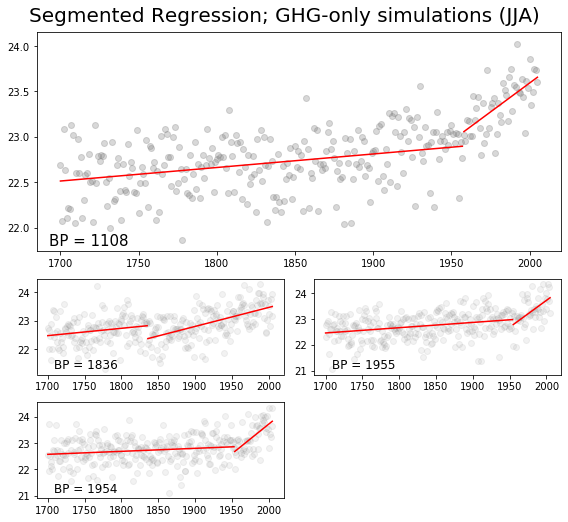

In [29]:
###########################################################################################################################
######################################        FUNCTION DEFINITIONS            #############################################
###########################################################################################################################

def f(breakpoints, x, y, fcache,num_breakpoints=1):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=1):
#     print('passed breakpoints are: ', breakpoints)
    breakpoints = tuple(map(int, sorted(breakpoints)))
#     print('processed breakpoints are: ', breakpoints)
    xs = np.split(x, breakpoints)
#     print('xs is ',xs)
#     print('')
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

###########################################################################################################################
##################################################    PARAMETERS   ########################################################
###########################################################################################################################

axes_fontsize = 12
subtitle_fontsize = 15 

mean_axes_fontsize = 15
mean_title_fontsize = 18

num_breakpoints = 1

start_date = 1700
end_date   = 2006

###########################################################################################################################
############################################   CALCULATIONS AND DISPLAY    ################################################
###########################################################################################################################

fig = plt.figure(figsize=(8,7))
gs = gridspec.GridSpec(4, 2)

for ensemble_member in range(0,3):

    #identify arrays to be used for segmented regression analysis
    x = np.arange(start_date,end_date)
    y = SST.values[ensemble_member,start_date-850:end_date-850]
    
    current_ax = plt.subplot(gs[int(ensemble_member/2+2),int(ensemble_member%2)])

    #use brute force to find optimal breakpoint[s]
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
    #plot raw data 
    current_ax.scatter(x, y, c='grey',alpha=.1)
    #plot segmented regression 
    if num_breakpoints > 1:
        for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, currentf(x_interval), 'r-')
            current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.2,y=.0)
    elif num_breakpoints == 1:
        for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, current_f(x_interval), 'r-')
            current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.2,y=.0)
        
    #clear variables
    del breakpoints
    del y 
    del x    

#
#identify arrays to be used for segmented regression analysis
x = np.arange(start_date,end_date)
y = SST.values[:,start_date-850:end_date-850].mean(axis=0)
    
current_ax = plt.subplot(gs[0:4])

#use brute force to find optimal breakpoint[s]
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
#plot raw data 
current_ax.scatter(x, y, c='grey',alpha=.3)
#plot segmented regression 
if num_breakpoints > 1:
    for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, currentf(x_interval), 'r-')
        current_ax.set_title('BPs = '+str(int(breakpoints+850)),x=.1,y=.0,fontsize=15)
elif num_breakpoints == 1:
    for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, current_f(x_interval), 'r-')
        current_ax.set_title('BP = '+str(int(breakpoints+850)),x=.1,y=.0,fontsize=15)

fig.tight_layout()
fig.suptitle('Segmented Regression; GHG-only simulations (JJA)',fontsize=20,y=1.03);

<center><h2>Offset Year: SONDJFMAMJJA</h2></center>

Here I load the SST data projected by GHG-only simulations, filter for time and space, then average the SST in the filtered region to get a time series of SST in GoM during the offset year starting in September

In [10]:
###########################################################################################################################
######################################               PARAMETERS               #############################################
###########################################################################################################################

#define boundaries of Gulf of Maine
lat_range = [41.5,45]
lon_range = [-74,-66]

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

#initialize the array that will hold the SST time series for each ensemble member 
LME_GoM_SST = xr.DataArray(np.ones([3,1155])*np.nan,
              coords=[np.arange(1,4),np.arange(850,2005)], 
              dims=['ensemble_member', 'time'], 
              attrs={'Info':'Yearly offset year average SONDJFMAMJJA in the Gulf of Maine as produced by the CESM-LME full forcing simulations',
                     'Season':'Offset year SONDFMAMJJA; time is the year in which the offset begins'})

#handle one ensemble member at a time 
for ensemble_member in range(1,4):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.GHG.00'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
    else:
        SST = xr.open_mfdataset('b.e11.BLMTRC5CN.f19_g16.GHG.0'+
                                str(ensemble_member)+
                                '.pop.h.SST.*.nc')['SST'].squeeze()
        
    #keeping myself updated on progress
    print('    converting longitude to be from -180 to 180')
    #center lon on 0 
    SST.TLONG.values = xr.where(SST.TLONG.values>180,
                                SST.TLONG.values-360,
                                SST.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
    SST_GoM = SST.where(np.logical_and(np.logical_and(SST.TLAT>lat_range[0], SST.TLAT<lat_range[1]),
                                       np.logical_and(SST.TLONG>lon_range[0], SST.TLONG<lon_range[1])),
                        np.nan)
    
    #average GoM SST
    SST_GoM_average = SST_GoM.mean(axis=1,skipna=True).mean(axis=1,skipna=True)

    #keeping myself updated on progress
    print('    temporal filtering and averaging...')
    #average offset year
    temp = SST_GoM_average.values[8:-4].reshape(1155,12)
    SST_GoM_average_offset_year_average = np.nanmean(temp,axis=1)

    #keeping myself updated on progress
    print('    COMPLETED...saving timeseries')
    #assign index to initialized array
    LME_GoM_SST.values[ensemble_member-1,:]=SST_GoM_average_offset_year_average

Processing ensemble member 1
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 2
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries
Processing ensemble member 3
    converting longitude to be from -180 to 180
    sptially filtering
    temporal filtering and averaging...
    COMPLETED...saving timeseries


In [30]:
SST = xr.open_dataarray('LME.GoM.GHG-only.SST.SONDJFMAMJJA.nc')

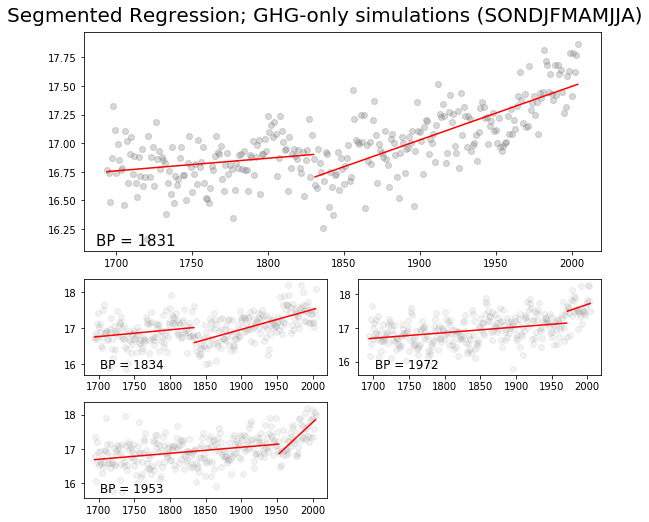

In [31]:
###########################################################################################################################
######################################        FUNCTION DEFINITIONS            #############################################
###########################################################################################################################

def f(breakpoints, x, y, fcache,num_breakpoints=1):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=1):
#     print('passed breakpoints are: ', breakpoints)
    breakpoints = tuple(map(int, sorted(breakpoints)))
#     print('processed breakpoints are: ', breakpoints)
    xs = np.split(x, breakpoints)
#     print('xs is ',xs)
#     print('')
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

###########################################################################################################################
##################################################    PARAMETERS   ########################################################
###########################################################################################################################

axes_fontsize = 12
subtitle_fontsize = 15 

mean_axes_fontsize = 15
mean_title_fontsize = 18

num_breakpoints = 1

start_date = 1694
end_date   = 2005

###########################################################################################################################
############################################   CALCULATIONS AND DISPLAY    ################################################
###########################################################################################################################

fig = plt.figure(figsize=(8,7))
gs = gridspec.GridSpec(4, 2)

for ensemble_member in range(0,3):

    #identify arrays to be used for segmented regression analysis
    x = np.arange(start_date,end_date)
    y = SST.values[ensemble_member,start_date-850:end_date-850]
    
    current_ax = plt.subplot(gs[int(ensemble_member/2+2),int(ensemble_member%2)])

    #use brute force to find optimal breakpoint[s]
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
    #plot raw data 
    current_ax.scatter(x, y, c='grey',alpha=.1)
    #plot segmented regression 
    if num_breakpoints > 1:
        for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, currentf(x_interval), 'r-')
            current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.2,y=.0)
    elif num_breakpoints == 1:
        for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
            x_interval = np.array([xi.min(), xi.max()])
            current_ax.plot(x_interval, current_f(x_interval), 'r-')
            current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.2,y=.0)
        
    #clear variables
    del breakpoints
    del y 
    del x    

#
#identify arrays to be used for segmented regression analysis
x = np.arange(start_date,end_date)
y = SST.values[:,start_date-850:end_date-850].mean(axis=0)
    
current_ax = plt.subplot(gs[0:4])

#use brute force to find optimal breakpoint[s]
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {},num_breakpoints), finish=None)
#plot raw data 
current_ax.scatter(x, y, c='grey',alpha=.3)
#plot segmented regression 
if num_breakpoints > 1:
    for current_f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, currentf(x_interval), 'r-')
        current_ax.set_title('BPs = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)
elif num_breakpoints == 1:
    for current_f, xi, yi in find_best_piecewise_polynomial([breakpoints], x, y,num_breakpoints=num_breakpoints):
        x_interval = np.array([xi.min(), xi.max()])
        current_ax.plot(x_interval, current_f(x_interval), 'r-')
        current_ax.set_title('BP = '+str(int(breakpoints+start_date)),x=.1,y=.0,fontsize=15)

fig.tight_layout()
fig.suptitle('Segmented Regression; GHG-only simulations (SONDJFMAMJJA)',fontsize=20,y=1.03);